In [1]:
import sys
sys.path.append("..")
import ncdm
import scales

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Example 1)
Goal: Get the surpression in the halo mass function and sub-halo mass function of a standard thermal relic with m_x = 3keV. Using the transfer function description from <https://doi.org/10.1093/mnras/stt829"> (Schneider et al. 2013).

The transfer function 
$$
T(k) = \sqrt{P_{WDM}(k)/P_{CDM}(k)}  =  (1 + (\alpha k)^{2 \mu})^{-5 / \mu}
$$
with $\mu=1.12$ corresponds to $\alpha=\alpha$, $\beta=2.24$, $\gamma = 4.464$ in our description
$$
T(k) = (1 + (\alpha k)^{\beta})^{-\gamma}
$$
We first to have to approximate it through a function with a new $\beta^*$ and with $\gamma^*=5$

In [2]:
alpha = scales.alpha_wdm(omega_x=0.27, h=0.7, mx=3.) 
beta, gamma = 2.245, 5./1.12
alphanew, betanew, gammanew = scales.alpha_beta_gamma_3_to_2_par(alpha, beta, gamma, gammamap=5.)
print("alpha = %.5f, beta = %.3f, gamma = %.1f" % (alpha, beta, gamma))
print("alphanew = %.5f, betanew = %.3f, gammanew = %.1f" % (alphanew, betanew, gammanew))

alpha = 0.01460, beta = 2.245, gamma = 4.5
alphanew = 0.01370, betanew = 2.225, gammanew = 5.0


In [3]:
# calculate the half mode mass
mhm = scales.half_mode_mass(alphanew, betanew, gammanew)
print("mhm = %.2e Msol/h" % mhm)

mhm = 3.76e+08 Msol/h


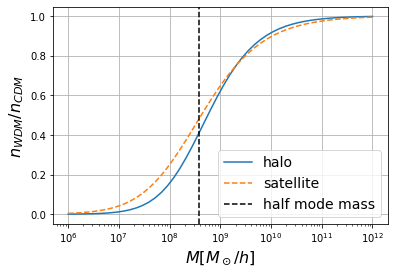

In [4]:
# Now get the mass function
m = np.logspace(6,12)

fhalo = ncdm.mass_function_beta_mhm(m, beta=betanew, mhm=mhm, mode="halo")
fsat = ncdm.mass_function_beta_mhm(m, beta=betanew, mhm=mhm, mode="satellite")

plt.semilogx(m, fhalo, label="halo")
plt.semilogx(m, fsat, label="satellite", linestyle="dashed")
plt.axvline(mhm, label="half mode mass", color="black", linestyle="dashed")
plt.legend(fontsize=14)
plt.grid()
plt.xlabel(r"$M [M_\odot /h]$", fontsize=16)
plt.ylabel(r"$n_{WDM} / n_{CDM}$", fontsize=16);

# Compare different thermal relic masses

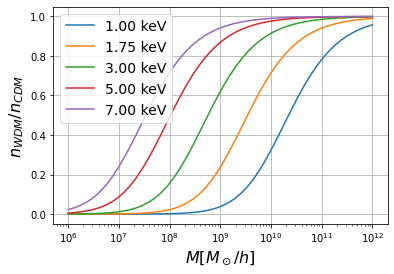

In [5]:
for mx in 1.,1.75,3.,5.,7:
    alpha = scales.alpha_wdm(omega_x=0.27, h=0.7, mx=mx)
    alphanew, betanew, gammanew = scales.alpha_beta_gamma_3_to_2_par(alpha, 2.24, 5./1.12, gammamap=5.)
    mhm = scales.half_mode_mass(alphanew, betanew, gammanew)
    
    fhalo = ncdm.mass_function_beta_mhm(m, beta=betanew, mhm=mhm, mode="halo")
    
    plt.semilogx(m, fhalo, label="%.2f keV" % mx)
    plt.legend(fontsize=14, loc="upper left")
    plt.grid()
    plt.xlabel(r"$M [M_\odot /h]$", fontsize=16)
    plt.ylabel(r"$n_{WDM} / n_{CDM}$", fontsize=16)